In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hdpgmm.preprocessing import RedshiftCalculation, LumDist
from astropy.cosmology import LambdaCDM, z_at_value
import astropy.units as u

Here we test the method `RedshiftCalculation` from the `hdpgmm.preprocessing` module using `astropy.cosmology`'s method `z_at_value` as reference. We will use the default cosmological parameters from [Planck et al (2021)](https://www.aanda.org/articles/aa/pdf/2020/09/aa33910-18.pdf) for a spatially flat $\Lambda$CDM cosmology - $H_0 = 67.4$ km s$^{-1}$Mpc$^{-1}$, $\Omega_m = 0.315$.

In [3]:
h = 0.674
om = 0.315
ol = 0.685

astropy_cosmo = LambdaCDM(H0 = h*100, Om0 = om, Ode0 = ol)

LD_with_dimensions = np.linspace(0.001,4.5e3,1000)* u.Mpc
LD_no_dimensions   = np.linspace(0.001,4.5e3,1000)
z_astropy = np.array([z_at_value(astropy_cosmo.luminosity_distance, d) for d in LD_with_dimensions])
z_hdpgmm  = np.array([RedshiftCalculation(d, h, om, 1-om) for d in LD_no_dimensions])

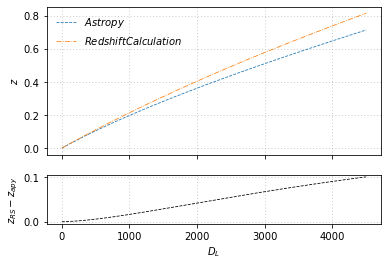

In [4]:
fig, (ax,res) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex = True)
ax.plot(LD_no_dimensions, z_astropy, ls = '--', lw = 0.8, label = "$Astropy$")
ax.plot(LD_no_dimensions, z_hdpgmm, ls = '-.', lw = 0.8, label = "$RedshiftCalculation$")
ax.set_ylabel('$z$')
ax.grid(True,dashes=(1,3))
ax.legend(loc = 0, frameon= False)
res.plot(LD_no_dimensions, z_hdpgmm-z_astropy, ls = '--', color = 'k', lw = 0.8)
res.set_ylabel('$z_{RS} - z_{apy}$')
res.set_xlabel('$D_L$')
res.grid(True,dashes=(1,3))

For $D_L\gtrsim 10^3$ Mpc there is an appreciable difference between the second-order approximation made in RedshiftCalculation and Astropy, so it would be good to switch to Astropy's redshift calculation.